# サーマル RJPEG 画像加工　デモ

### 環境準備

In [15]:
# 所要時間 20秒
!apt-get update
!sudo apt-get install exiftool
# !sudo pip install numpy matplotlib
# !sudo pip install flirimageextractor

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [73.5 

#### サンプル実行

In [7]:
cd /content/

/content


In [0]:
rm -rf Thermimage_demo 

In [3]:
!git clone https://github.com/Chitama/Thermimage_demo.git

Cloning into 'Thermimage_demo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 2), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [8]:
cd Thermimage_demo

/content/Thermimage_demo


#### イメージアップロード

In [10]:
# 実行ボタンがクルクル回っている間にファイルをアップロードする
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
exiftool_path = "exiftool"
flir_img_filename = "/content/Thermimage_demo/" + file_name
flir_csv_filename = "/content/Thermimage_demo/" + file_name + "_output.csv"
print(file_name)

Saving DJI_0419_R.JPG to DJI_0419_R.JPG
DJI_0419_R.JPG


/content/Thermimage_demo/DJI_0419_R.JPG


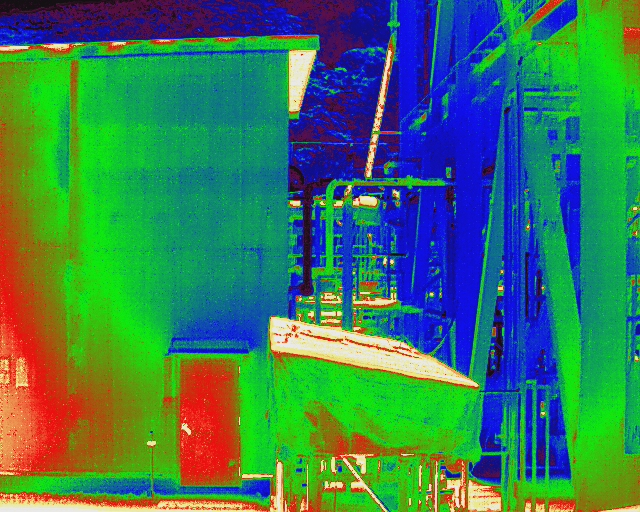

In [11]:
from IPython.display import Image,display_jpeg
print(flir_img_filename)
display_jpeg(Image(flir_img_filename))

In [0]:
######################################
# 任意の温度以上を指定
temp_val = 25
######################################

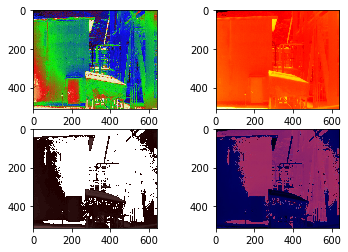

In [16]:
import flir_image_extractor_custom
fir = flir_image_extractor_custom.FlirImageExtractor()
fir.process_image(flir_img_filename, flir_csv_filename, temp_val)
fir.plot()

##### 結果の説明
- ①右上：元画像
- ②左上：赤外線画像をベクトル化してプロットしたもの
- ③右下：指定温度以上のピクセルだけ抜き出したもの
- ④左下：指定温度以上のピクセル部分の色だけを変えたもの


### CSV

##### CSV出力結果

In [17]:
import pandas as pd 
data= pd.read_csv(flir_csv_filename)
df_bool = (data["temp (c)"] >temp_val).sum()/len(data)*100
print("------ ------ ------ ------")
print("指定温度 [ " + str(temp_val) + " ℃ ] 以上の割合： "  +  str(round(df_bool, 2)) + " %")
print("------ ------ ------ ------")
print("最大温度： " +  str(round(data["temp (c)"].max(), 2)) + " ℃")
print("最小温度： " +  str(round(data["temp (c)"].min(), 2)) + " ℃")
print("------ ------ ------ ------")
data

------ ------ ------ ------
指定温度 [ 25 ℃ ] 以上の割合： 45.38 %
------ ------ ------ ------
最大温度： 47.54 ℃
最小温度： 7.0 ℃
------ ------ ------ ------


,x,y,temp (c)
0,0,0,8.056845
1,0,1,7.983394
2,0,2,8.032368
3,0,3,8.105779
4,0,4,8.007885
...,...,...,...
327675,511,635,26.274731
327676,511,636,26.213874
327677,511,637,26.538039
327678,511,638,26.538039
